##Installing Kedro

In [ ]:
!pip install kedro

In [2]:
!kedro info

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa

 _            _
| | _____  __| |_ __ ___
| |/ / _ \/ _` | '__/ _ \
|   <  __/ (_| | | | (_) |
|_|\_\___|\__,_|_|  \___/
v0.17.5

kedro allows teams to create analytics
projects. It is developed as part of
the Kedro initiative at QuantumBlack.

No plugins installed


##Creating a new project on kedro

In [3]:
!kedro new

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa

Project Name:
Please enter a human readable name for your new project.
Spaces and punctuation are allowed.
 [New Kedro Project]: scania

Repository Name:
Please enter a directory name for your new project repository.
Alphanumeric characters, hyphens and underscores are allowed.
Lowercase is recommended.
 [scania]: scania

Python Package Name:
Please enter a valid Python package name for your project package.
Alphanumeric characters and underscores are allowed.
Lowercase is recommended. Package name must start with a letter
or underscore.
 [scania]: scania

Change directory to the project generated in /content/scania

A best-practice setup includes initialising git and creating a virtual environment befor

###Once you create this project, a directory will be generated with folders as shown below
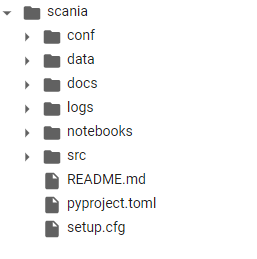

##Importing some functions

In [6]:
from kedro.pipeline import node
from kedro.pipeline import Pipeline
from kedro.io import DataCatalog, MemoryDataSet
from kedro.runner import SequentialRunner
import os

In [7]:
os.chdir('/content/scania')

In [ ]:
!kedro install #Installing some kedro dependencies

##Creating a new pipeline : This will create a pipeline with default kedro templates

In [ ]:
!kedro pipeline create model_processing
!kedro pipeline create model_prediction 

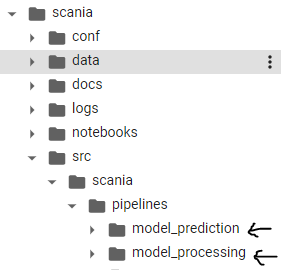

##There is a kaggle problem to predict APS failure in scania trucks. We will create a pipeline for data cleaning and model prediction. The model was trained in the past and its pickle file is already available

In [43]:
#Function that takes raw data as inputs and returns the clean data. 
def pre_processing(X):
  X = X.replace('na',np.NaN)
  X = X.astype(float)
  X = X.drop('cd_000',axis=1)

  features_tobe_eliminated =  ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'bm_000']
  median_imp_features = ['ec_00', 'cm_000', 'cl_000', 'ed_000', 'ak_000', 'ca_000', 'dm_000', 'df_000', 'dg_000', 'dh_000', 'dl_000', 'dj_000', 'dk_000', 'eb_000', 'di_000', 'ac_000', 'bx_000', 'cc_000', 'bd_000', 'ds_000', 'dt_000', 'dp_000', 'dq_000', 'dr_000', 'du_000', 'dv_000', 'bc_000', 'cp_000', 'de_000', 'do_000', 'dy_000', 'ef_000', 'ar_000', 'bz_000', 'dx_000', 'dz_000', 'ea_000', 'eg_000', 'be_000', 'dd_000', 'ce_000', 'ax_000', 'ae_000', 'af_000', 'av_000', 'bf_000', 'bs_000', 'cb_000', 'bu_000', 'bv_000', 'cq_000', 'dn_000', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ah_000', 'bb_000', 'al_000', 'an_000', 'ap_000', 'bg_000', 'bh_000', 'ai_000', 'aj_000', 'am_0', 'as_000', 'at_000', 'au_000', 'ao_000', 'aq_000', 'bi_000', 'bj_000', 'by_000', 'ci_000', 'cj_000', 'ck_000', 'bt_000', 'aa_000']

  median_imputer = pickle.load(open('/content/scania/median_imputer.pkl', 'rb'))
  X_median = median_imputer.transform(X[median_imp_features])
  X[median_imp_features] = X_median
  X = X.drop(features_tobe_eliminated,axis=1)

  scaler = pickle.load(open('/content/scania/normalizer.pkl', 'rb'))
  X_scaled = scaler.transform(X)
  X_mice = pd.DataFrame(X_scaled, columns= X.columns)

  mice_imputer = pickle.load(open('/content/scania/mice_imputer.pkl', 'rb'))
  X_imputed = mice_imputer.transform(X_mice)
  X_imputed = pd.DataFrame(X_imputed,columns=X_mice.columns)

  encoder = load_model('/content/scania/mice_encoder.h5')
  X_encoded = encoder.predict(X_imputed)
  X_final = np.hstack((np.array(X_imputed),X_encoded))
  return X_final

This above function code should be saved as node.py in the model_processing pipeline


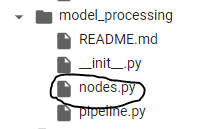

In [ ]:
from kedro.pipeline import Pipeline, node
from .nodes import pre_processing

def create_pipeline(**kwargs):
    return Pipeline(
        [ 
         node(
            func=pre_processing,
            inputs='raw_data',
            outputs='clean_data',
            name='pre_processing'),
         ])
    

This creates a pipeline that connects the node/function named preprocessing to it. This code should be saved as pipeline.py in model_processing folder

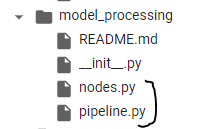

In [44]:
#This function predicts the failure in trucks using a pretrained model
def prediction(data):
  best_model = pickle.load(open('best_model.pkl','rb'))
  y_prob = best_model.predict_proba(data)[:,1]

  y_pred=[]
  for i in y_prob:
    if i>=0.005551333393319321:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

This function code should be saved as node.py in model_predction pipeline 

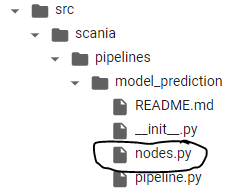

In [ ]:
from kedro.pipeline import Pipeline, node
from .nodes import prediction

def create_pipeline(**kwargs):
    return Pipeline(
        [ 
         node(
            func=prediction,
            inputs='clean_data',
            outputs='prediction',
            name='prediction'),
         ])
    

This creates a pipeline that connects the node/function named prediction to it. This code should be saved as pipeline.py in model_prediction pipeline folder

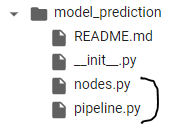

##Now that we have created the model pipeline, we have to register our pipeline in pipeline_registry.py file. 

In [ ]:
"""Project pipelines."""
from typing import Dict

from kedro.pipeline import Pipeline
from scania.pipelines import model_processing
from scania.pipelines import model_prediction


def register_pipelines() -> Dict[str, Pipeline]:
    """Register the project's pipelines.

    Returns:
        A mapping from a pipeline name to a ``Pipeline`` object.
    """
    p1 = model_processing.create_pipeline()
    p2 = model_prediction.create_pipeline()
    return {"__default__": Pipeline([p1,p2])}

This code should be saved as pipeline_registry.py 

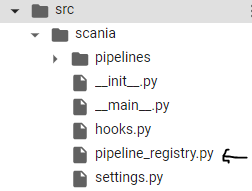

##Now we need to register our dataset in catalog.yml file

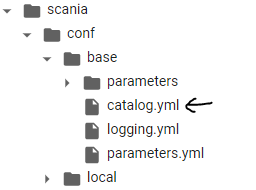

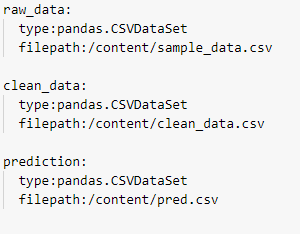

Now you can run the pipeline and the predictions will be saved in the filepath mentioned above for prediction

In [12]:
!kedro run

2021-11-02 08:47:18,548 - root - INFO - Registered CLI hooks from 1 installed plugin(s): kedro-telemetry-0.1.2
2021-11-02 08:47:18,550 - kedro_telemetry.plugin - INFO - You have opted into product usage analytics.
2021-11-02 08:47:18,550 - kedro_telemetry.plugin - WARNING - Something went wrong with getting the username to send to Heap. Exception: [Errno 6] No such device or address
2021-11-02 08:47:18,728 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
fatal: not a git repository (or any of the parent directories): .git
2021-11-02 08:47:18,734 - kedro.framework.session.session - WARNING - Unable to git describe /content/scania
2021-11-02 08:47:18,741 - root - INFO - ** Kedro project scania
2021-11-02 08:47:18,751 - kedro.framework.session.store - INFO - `save()` not implemented for `BaseSessionStore`. Skipping the step.
Traceback (most recent call last):
  File "/usr/local/bin/kedro", line 8, in <module>
    sys.exit(main